## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

#### ① 导数

In [93]:
from sklearn.datasets import load_boston

In [94]:
data = load_boston()

In [95]:
X, Y = data['data'], data['target']

In [96]:
# X[:, 5]

In [97]:
def price(rm , k ,b):
    """Price Function"""
    return k * rm + b

In [98]:
def loss(y, y_hat):
    """Loss Function"""
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)

#### 公式

#### loss
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

#### loss 对k求偏导
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

#### loss 对b求偏导
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

#### 导数

In [99]:
def partial_k(x, y ,y_hat):
    """k 偏导"""
    gradient = 0
    n = len(y)
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient

In [100]:
def partial_b(y, y_hat):
    """b 偏导"""
    gradient = 0
    n = len(y)
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [101]:
import random

In [102]:
try_times = 2000

X, Y = data['data'], data['target']
X_rm = X[:, 5]

min_loss = float('inf') #无穷大

k = random.random() * 200 - 100
b = random.random() * 200 - 100

rate = 1e-4

time_log = 0

for i in range(try_times):
    price_by_k_and_b = [price(rm, k, b) for rm in X_rm]
    current_loss = loss(Y, price_by_k_and_b)
    
    
    if current_loss < min_loss:
        min_loss = current_loss
        
        if i % 50 == 0:
            print("when time is {}, best_k is {}, best_b is {}, loss is {}".format(i, k, b, min_loss))
            
    k_gradient = partial_k(X_rm, Y, price_by_k_and_b)
    b_gradient = partial_b(Y, price_by_k_and_b)
    k = k + (-1 * k_gradient) * rate  # k与偏导方向相反
    b = k + (-1 * b_gradient) * rate  # b与偏导方向相反
    

when time is 0, best_k is 10.942519965700527, best_b is -8.871946053543084, loss is 1441.4114612538503
when time is 50, best_k is 8.064182857248309, best_b is 8.056875200447609, loss is 1354.897855176262
when time is 100, best_k is 6.24005753834956, best_b is 6.235431777810013, loss is 572.9217883027418
when time is 150, best_k is 5.094032250826869, best_b is 5.091091418894996, loss is 263.8708313931719
when time is 200, best_k is 4.374030205992374, best_b is 4.372147947598217, loss is 141.63594745328967
when time is 250, best_k is 3.921681597100456, best_b is 3.9204643982997145, loss is 93.23200116199409
when time is 300, best_k is 3.637488982045468, best_b is 3.6366896136996116, loss is 74.02810836893504
when time is 350, best_k is 3.4589420806862767, best_b is 3.4584052185740846, loss is 66.38634662957482
when time is 400, best_k is 3.3467681736380572, best_b is 3.3463962337375106, loss is 63.33124837233333
when time is 450, best_k is 3.2762937754453434, best_b is 3.2760254496019354

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
def draw_rm_price():
    plt.scatter(X[:, 5], Y)

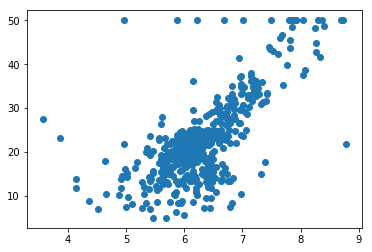

In [105]:
draw_rm_price()

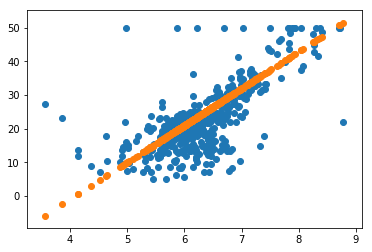

In [106]:
k = 11
b = -45
draw_rm_price()
plt.scatter(X[:, 5], price(X[:, 5], k, b))

#### ② 动态规划

In [107]:
from collections import defaultdict

In [108]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [109]:
price = defaultdict(int)

In [110]:
for i, p in enumerate(original_price):
    price[i + 1] = p

In [111]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

##### python函数式编程

In [112]:
def example(f, arg):
    return f(arg)

In [113]:
def add_ten(num):
    return num + 10

In [114]:
def mul_ten(num):
    return num * 10 

In [115]:
operations = [add_ten, mul_ten]

for f in operations:
    print(example(f, 100))

110
1000


#### 装饰器

#### 无参数

In [116]:
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    
    print('function: {} called once! '.format(f.__name__))
    called_time[f.__name__] += 1
    
    return result

In [117]:
def some_funcion_1(): 
    print('I am function 1')

In [118]:
get_call_times(some_funcion_1)

I am function 1
function: some_funcion_1 called once! 


In [119]:
called_time

defaultdict(int, {'some_funcion_1': 1})

#### 有参数

In [120]:
from functools import wraps

In [121]:
called_time_with_arg = defaultdict(int)
def get_call_time(f):
    @wraps(f)
    def wrap(n):
        result = f(n)
        
        called_time_with_arg[(f.__name__, n)] += 1
        
        return result
    return wrap

In [122]:
def add_ten(n): return n + 10

In [123]:
add_ten = get_call_time(add_ten)
add_ten(10)

20

#### @

In [124]:
@get_call_time
def add_twenty(n): 
    return n + 20

In [125]:
# 相当于 add_twenty = get_call_time(add_twenty)

In [126]:
add_twenty(9)

29

#### ③ Cutting Problem

In [127]:
solution = {}

In [128]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

In [129]:
def r(n):
    max_price, max_split = max([(price[n], 0)] + [(r(n - i) + r(i), i) for i in range(1, n)])
    solution[n] = [n - max_split, max_split]
    return max_price

In [130]:
r(10)

30

In [131]:
solution

{1: [1, 0],
 2: [2, 0],
 3: [3, 0],
 4: [2, 2],
 5: [2, 3],
 6: [6, 0],
 7: [1, 6],
 8: [2, 6],
 9: [3, 6],
 10: [10, 0]}

In [132]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [133]:
#r(105)

In [134]:
#parse_solution(105)

### Dynamic Programming

+ 1.Overlapping Subproblems
+ 2.Overlapping computing saved in a table
+ 3.Parse solution

In [135]:
def memo(f): 
    memo.already_computed = {}
    @wraps(f)
    def wrap(arg):
        result = None
        
        if arg in memo.already_computed: 
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        
        return result
    
    return wrap

In [136]:
@memo
def r(n):
    max_price, max_split = max([(price[n], 0)] + [(r(n - i) + r(i), i) for i in range(1, n)])
    solution[n] = [n - max_split, max_split]
    return max_price

In [137]:
#r(20)

In [138]:
#r(105)

In [139]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [140]:
r(105)

332

In [141]:
parse_solution(105)

[6, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [142]:
r   #不加@wraps(f) r对应的函数是wrap

<function __main__.r>

In [143]:
called_time_with_arg

defaultdict(int, {('add_ten', 10): 1, ('add_twenty', 9): 1})

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

#### 公式
$$ loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|} $$

$$ loss = \frac{1}{n} \sum{|y_i - (kx_i + b_i)|} $$

#### 对k求偏导  
$$ loss = \frac{1}{n} \sum{(-x_i)}$$
$$ loss = \frac{1}{n} \sum{(x_i)}$$

$$ loss = \frac{1}{n} \sum{\frac{|y_i - (kx_i + b_i)|x_i}{y_i - (kx_i + b_i)}} $$
$$ loss = \frac{1}{n} \sum{\frac{|y_i - \hat{y_i})|x_i}{y_i - \hat{y_i}}} $$
$$ y_i != (kx_i + b_i) $$

#### 对b求偏导
$$ loss = \frac{1}{n} \sum{(-1)}$$
$$ loss = \frac{1}{n} \sum{(1)}$$

$$ loss = \frac{1}{n} \sum{\frac{|y_i - (kx_i + b_i)|}{y_i - (kx_i + b_i)}} $$
$$ loss = \frac{1}{n} \sum{\frac{|y_i - \hat{y_i})|}{y_i - \hat{y_i}}} $$
$$ y_i != (kx_i + b_i) $$

##### ？？？？？问题很大

In [193]:
def price(rm , k ,b):
    """Price Function"""
    return k * rm + b

In [194]:
def loss_abs(y, y_hat):
    """Loss Function"""
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)

In [227]:
def partial_k(x, y ,y_hat):
    """k 偏导"""
    gradient = 0
    n = len(y)
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
#         if y_i == y_hat_i:
#             continue
#         gradient += abs(y_i - y_hat_i) / (y_i - y_hat_i) * x_i 
        if y_i < y_hat_i:
            gradient += x_i
        else:
            gradient -= x_i
            
    return 1 / n * gradient

In [228]:
def partial_b(y, y_hat):
    """b 偏导"""
    gradient = 0
    n = len(y)
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
#         if y_i == y_hat_i:
#             continue
#         gradient += abs(y_i - y_hat_i) / (y_i - y_hat_i)
        if y_i < y_hat_i:
            gradient += 1
        else:
            gradient -= 1
    
    return 1 / n * gradient

In [240]:
try_times = 10000

X, Y = data['data'], data['target']
X_rm = X[:, 5]

min_loss = float('inf') #无穷大

k = random.random() * 200 - 100
b = random.random() * 200 - 100

rate = 0.2

time_log = 0

for i in range(try_times):
    price_by_k_and_b = [price(rm, k, b) for rm in X_rm]
    current_loss = loss_abs(Y, price_by_k_and_b)    
    
    if current_loss < min_loss:
        
        min_loss = current_loss
        
        print("when time is {}, best_k is {}, best_b is {}, loss is {}".format(i, k, b, min_loss))
            
    k_gradient = partial_k(X_rm, Y, price_by_k_and_b)
    b_gradient = partial_b(Y, price_by_k_and_b)
    
    k = k + (-1 * k_gradient) * rate  # k与偏导方向相反
    b = b + (-1 * b_gradient )* rate  # b与偏导方向相反

when time is 0, best_k is 23.621196267389138, best_b is 7.2127153694212325, loss is 133.13049137772984
when time is 1, best_k is 22.364269389918782, best_b is 7.012715369421232, loss is 125.03116550119296
when time is 2, best_k is 21.107342512448426, best_b is 6.812715369421232, loss is 116.931839624656
when time is 3, best_k is 19.85041563497807, best_b is 6.612715369421232, loss is 108.8325137481191
when time is 4, best_k is 18.593488757507714, best_b is 6.412715369421232, loss is 100.73318787158222
when time is 5, best_k is 17.336561880037358, best_b is 6.212715369421232, loss is 92.63386199504534
when time is 6, best_k is 16.079635002567002, best_b is 6.012715369421231, loss is 84.53453611850847
when time is 7, best_k is 14.822708125096645, best_b is 5.812715369421231, loss is 76.43521024197153
when time is 8, best_k is 13.565781247626287, best_b is 5.612715369421231, loss is 68.3358843654346
when time is 9, best_k is 12.30885437015593, best_b is 5.412715369421231, loss is 60.23655

when time is 160, best_k is 3.08222946897015, best_b is 2.5866284128994987, loss is 5.539062522543008
when time is 161, best_k is 3.0909966626460395, best_b is 2.578723274559578, loss is 5.538605006945113
when time is 162, best_k is 3.0850010104721264, best_b is 2.5684465947176807, loss is 5.538222380397376
when time is 163, best_k is 3.0937682041480157, best_b is 2.5605414563777598, loss is 5.537753849317275
when time is 164, best_k is 3.0877725519741026, best_b is 2.5502647765358626, loss is 5.537382238251738
when time is 165, best_k is 3.096539745649992, best_b is 2.5423596381959417, loss is 5.536905158246493
when time is 166, best_k is 3.0953836191677784, best_b is 2.5328734721880366, loss is 5.536448538376644
when time is 167, best_k is 3.094227492685565, best_b is 2.5233873061801315, loss is 5.536036929067875
when time is 168, best_k is 3.102994686361454, best_b is 2.5154821678402106, loss is 5.535715143796955
when time is 169, best_k is 3.096999034187541, best_b is 2.50520548799

when time is 565, best_k is 3.6980259116579135, best_b is -1.049735223464126, loss is 5.373012831039089
when time is 567, best_k is 3.7010772950571234, best_b is -1.067126527811952, loss is 5.372293046852489
when time is 569, best_k is 3.704128678456333, best_b is -1.084517832159778, loss is 5.371573262665885
when time is 571, best_k is 3.707180061855543, best_b is -1.101909136507604, loss is 5.3708534784792885
when time is 573, best_k is 3.710231445254753, best_b is -1.11930044085543, loss is 5.3701336942926945
when time is 575, best_k is 3.7132828286539628, best_b is -1.1366917452032559, loss is 5.3694139101060925
when time is 577, best_k is 3.7163342120531726, best_b is -1.1540830495510819, loss is 5.368694125919492
when time is 579, best_k is 3.7193855954523825, best_b is -1.1714743538989079, loss is 5.367974341732896
when time is 581, best_k is 3.7224369788515923, best_b is -1.1888656582467338, loss is 5.367254557546298
when time is 583, best_k is 3.725488362250802, best_b is -1.2

when time is 2541, best_k is 6.013915239721246, best_b is -15.261592930974063, loss is 4.841080474631153
when time is 2543, best_k is 6.015063065808204, best_b is -15.273450638483945, loss is 4.840622814045917
when time is 2545, best_k is 6.016210891895161, best_b is -15.285308345993828, loss is 4.840165153460689
when time is 2547, best_k is 6.017358717982119, best_b is -15.29716605350371, loss is 4.839707492875461
when time is 2549, best_k is 6.018506544069076, best_b is -15.309023761013593, loss is 4.839262017463759
when time is 2553, best_k is 6.025925516401093, best_b is -15.331948662199366, loss is 4.839051925050623
when time is 2555, best_k is 6.027073342488051, best_b is -15.343806369709249, loss is 4.838594264465398
when time is 2557, best_k is 6.0282211685750084, best_b is -15.355664077219132, loss is 4.838136603880166
when time is 2559, best_k is 6.029368994661966, best_b is -15.367521784729014, loss is 4.8376789432949305
when time is 2561, best_k is 6.0305168207489235, best_

when time is 3500, best_k is 6.838825516401162, best_b is -20.490051428997983, loss is 4.694027740820191
when time is 3501, best_k is 6.837343698219343, best_b is -20.49558502583593, loss is 4.693866352519558
when time is 3502, best_k is 6.840902196243059, best_b is -20.50032810883988, loss is 4.693758792114537
when time is 3503, best_k is 6.839420378061241, best_b is -20.505861705677827, loss is 4.693594709719095
when time is 3504, best_k is 6.837938559879422, best_b is -20.511395302515773, loss is 4.693491164214501
when time is 3505, best_k is 6.846122354345826, best_b is -20.515347871685734, loss is 4.6933819021795244
when time is 3506, best_k is 6.8446405361640075, best_b is -20.52088146852368, loss is 4.693217819784086
when time is 3507, best_k is 6.843158717982189, best_b is -20.526415065361626, loss is 4.69305373738864
when time is 3508, best_k is 6.841676899800371, best_b is -20.53194866219957, loss is 4.69293200230759
when time is 3509, best_k is 6.849860694266774, best_b is -

when time is 4742, best_k is 7.774124330630324, best_b is -26.113766844018254, loss is 4.5620786127834805
when time is 4743, best_k is 7.769590338535462, best_b is -26.118509927022206, loss is 4.562010776600728
when time is 4744, best_k is 7.7744168207489, best_b is -26.121671982358176, loss is 4.561897769886389
when time is 4745, best_k is 7.769882828654039, best_b is -26.126415065362128, loss is 4.561878735684605
when time is 4746, best_k is 7.774709310867477, best_b is -26.129577120698098, loss is 4.561716926989298
when time is 4748, best_k is 7.780081642883287, best_b is -26.136691745204025, loss is 4.5616699912708825
when time is 4749, best_k is 7.775547650788425, best_b is -26.141434828207977, loss is 4.561504563261978
when time is 4750, best_k is 7.780374133001864, best_b is -26.144596883543947, loss is 4.561489148373788
when time is 4751, best_k is 7.775840140907002, best_b is -26.1493399665479, loss is 4.56137252234585
when time is 4752, best_k is 7.780666623120441, best_b is 

when time is 6506, best_k is 8.607430259483971, best_b is -31.516138385520275, loss is 4.475708612801556
when time is 6508, best_k is 8.607769389918754, best_b is -31.520881468524227, loss is 4.475673073119637
when time is 6510, best_k is 8.612431049997806, best_b is -31.524834037694188, loss is 4.475564602408472
when time is 6511, best_k is 8.612606148812034, best_b is -31.527205579196163, loss is 4.475536328065022
when time is 6512, best_k is 8.612781247626263, best_b is -31.52957712069814, loss is 4.4755080537215655
when time is 6513, best_k is 8.612956346440491, best_b is -31.531948662200115, loss is 4.475479779378116
when time is 6514, best_k is 8.61313144525472, best_b is -31.53432020370209, loss is 4.475451505034658
when time is 6515, best_k is 8.613306544068948, best_b is -31.536691745204067, loss is 4.47542323069121
when time is 6516, best_k is 8.613481642883176, best_b is -31.539063286706043, loss is 4.47539495634776
when time is 6517, best_k is 8.613656741697405, best_b is -

when time is 7363, best_k is 8.912755555926443, best_b is -33.33985380054062, loss is 4.455587037331518
when time is 7368, best_k is 8.912219982803913, best_b is -33.348549452714536, loss is 4.4555347212414596
when time is 7370, best_k is 8.914137769365178, best_b is -33.351711508050506, loss is 4.45548927882965
when time is 7371, best_k is 8.91434686027427, best_b is -33.35329253571849, loss is 4.455476561992175
when time is 7372, best_k is 8.914555951183361, best_b is -33.35487356338647, loss is 4.455463845154703
when time is 7373, best_k is 8.914765042092453, best_b is -33.35645459105445, loss is 4.455451128317227
when time is 7374, best_k is 8.914974133001545, best_b is -33.35803561872243, loss is 4.45543841147975
when time is 7375, best_k is 8.915183223910637, best_b is -33.359616646390414, loss is 4.455425694642271
when time is 7376, best_k is 8.915392314819728, best_b is -33.361197674058396, loss is 4.455412977804794
when time is 7377, best_k is 8.91560140572882, best_b is -33.3

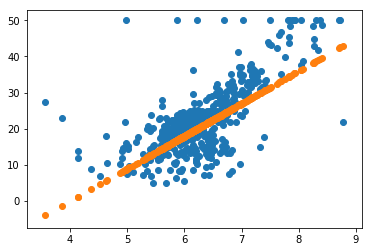

In [241]:
k = 9
b = -36
draw_rm_price()
plt.scatter(X[:, 5], price(X[:, 5], k, b))

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [150]:
from functools import lru_cache  #作用为缓存，去重，将函数运行结果保存，遇到传入相同参数时，使用缓存结果即可

In [151]:
solution = dict()

In [152]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    # init
    # D(i, 0) = i
    # D(0, j) = j
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    # start
    string1_tail = string1[-1]
    string2_tail = string2[-1]
    
    candidate = [
        (edit_distance(string1[:-1], string2) + 1, "Del {}".format(string1_tail)),  # 删除
        (edit_distance(string1, string2[:-1]) + 1, "Add {}".format(string2_tail))   # 插入
    ] 
    
    if string1_tail == string2_tail:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, "No Action")  # 无动作
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, "Sub {} -> {}".format(string1_tail, string2_tail)) # 替代
    
    candidate.append(both_forward)
    
    min_distance, operation = min(candidate, key=lambda x: x[0])
    
    if operation.startswith("Del"):
        solution[(string1, string2)] = (string1[:-1], string2)
    elif operation.startswith("Add"):
        solution[(string1, string2)] = (string1, string2[:-1])
    elif operation.startswith("Sub"):
        solution[(string1, string2)] = (string1[:-1], string2[:-1])
    else:
         solution[(string1, string2)] = (string1[:-1], string2[:-1])
    
    #solution[(string1, string2)] = operation
    
    return min_distance

In [153]:
edit_distance('ABCDE', 'ABCCEF')

2

In [154]:
solution

{('A', 'A'): ('', ''),
 ('A', 'AB'): ('A', 'A'),
 ('A', 'ABC'): ('A', 'AB'),
 ('A', 'ABCC'): ('A', 'ABC'),
 ('A', 'ABCCE'): ('A', 'ABCC'),
 ('A', 'ABCCEF'): ('A', 'ABCCE'),
 ('AB', 'A'): ('A', 'A'),
 ('AB', 'AB'): ('A', 'A'),
 ('AB', 'ABC'): ('AB', 'AB'),
 ('AB', 'ABCC'): ('AB', 'ABC'),
 ('AB', 'ABCCE'): ('AB', 'ABCC'),
 ('AB', 'ABCCEF'): ('AB', 'ABCCE'),
 ('ABC', 'A'): ('AB', 'A'),
 ('ABC', 'AB'): ('AB', 'AB'),
 ('ABC', 'ABC'): ('AB', 'AB'),
 ('ABC', 'ABCC'): ('ABC', 'ABC'),
 ('ABC', 'ABCCE'): ('ABC', 'ABCC'),
 ('ABC', 'ABCCEF'): ('ABC', 'ABCCE'),
 ('ABCD', 'A'): ('ABC', 'A'),
 ('ABCD', 'AB'): ('ABC', 'AB'),
 ('ABCD', 'ABC'): ('ABC', 'ABC'),
 ('ABCD', 'ABCC'): ('ABC', 'ABC'),
 ('ABCD', 'ABCCE'): ('ABCD', 'ABCC'),
 ('ABCD', 'ABCCEF'): ('ABCD', 'ABCCE'),
 ('ABCDE', 'A'): ('ABCD', 'A'),
 ('ABCDE', 'AB'): ('ABCD', 'AB'),
 ('ABCDE', 'ABC'): ('ABCD', 'ABC'),
 ('ABCDE', 'ABCC'): ('ABCD', 'ABCC'),
 ('ABCDE', 'ABCCE'): ('ABCD', 'ABCC'),
 ('ABCDE', 'ABCCEF'): ('ABCDE', 'ABCCE')}

In [155]:
res = []
def parse_solution(string1 ,string2, solution):
    res.append((string1,string2))
    left_string1, right_string2 = solution[(string1, string2)]
    
    if not left_string1 and not right_string2: return "It's over"
    
    return parse_solution(left_string1, right_string2, solution)

In [156]:
parse_solution('ABCDE', 'ABCCEF', solution)

"It's over"

In [157]:
res

[('ABCDE', 'ABCCEF'),
 ('ABCDE', 'ABCCE'),
 ('ABCD', 'ABCC'),
 ('ABC', 'ABC'),
 ('AB', 'AB'),
 ('A', 'A')]

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:

4. Using the simple words to describe: What's the machine leanring.¶

Ans:

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [158]:
import random
import matplotlib.pylab as plt
import math

In [159]:
#随机点位坐标
coordinate_x = [random.randint(-100, 100) for _ in range(20)]
coordinate_y = [random.randint(-100, 100) for _ in range(20)]

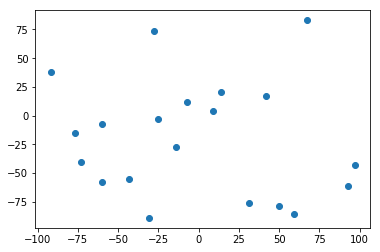

In [160]:
plt.scatter(coordinate_x, coordinate_y)

In [161]:
def get_distance(coord1, coord2):
    """计算两点的坐标"""
    return math.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

### 1. 先试试一个点出发(贪婪)

In [162]:
#先试试一个点
chosen_p = (-50, 10)
#点位坐标集合
coordinate_list = [(x, y) for x,y in zip(coordinate_x, coordinate_y)]

In [163]:
def get_shortest_path(start):
    """获得最短路径"""
    path = [start]
    for i in range(len(coordinate_list)):
        shortest_distance = float("inf")
        shortest_distance_coord = None
        for j in range(len(coordinate_list)):
            current_distance = get_distance(coordinate_list[j], start)
            if current_distance < shortest_distance:
                shortest_distance = current_distance
                shortest_distance_coord = coordinate_list[j]
        path.append(shortest_distance_coord)
        start = coordinate_list.pop(coordinate_list.index(shortest_distance_coord))
    return path

In [164]:
shortest_path = get_shortest_path(chosen_p)

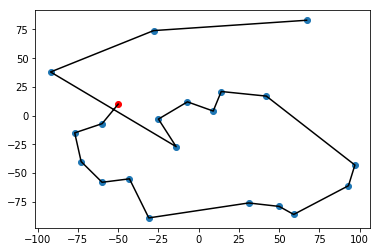

In [165]:
plt.scatter(coordinate_x, coordinate_y)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
X = [x[0] for x in shortest_path]
Y = [y[1] for y in shortest_path]
plt.plot(X, Y, color="black")

In [166]:
#计算距离
distance = 0
for index, coord in enumerate(shortest_path[:-1]):
    distance += get_distance(shortest_path[index], shortest_path[index + 1])

In [167]:
distance

759.4848323807215

### 2.动态规划

In [168]:
import numpy as np

In [169]:
#随机点位坐标
coordinate_x = [random.randint(-100, 100) for _ in range(20)]
coordinate_y = [random.randint(-100, 100) for _ in range(20)]
#先试试一个点
chosen_p = (-50, 10)
coordinate_x.insert(0, chosen_p[0])
coordinate_y.insert(0, chosen_p[1])
#点位坐标集合
coordinate_list = [(x, y) for x,y in zip(coordinate_x, coordinate_y)]

In [170]:
coordinate_array = np.array(coordinate_list)

In [171]:
coordinate_array

array([[-50,  10],
       [ 72, -20],
       [ 52, -76],
       [-46, -41],
       [-26, -24],
       [ 48,  -2],
       [ 96, -62],
       [ 46, -74],
       [ 92, -19],
       [-31, -46],
       [-93,  55],
       [ 84,  95],
       [ 72,  35],
       [ 29,  81],
       [-44, -83],
       [-11,  70],
       [-64, -32],
       [ 81,  23],
       [  3,  89],
       [-79,  99],
       [-77, -65]])

In [172]:
coordinate_array.shape

(21, 2)

In [173]:
#将两点之间的距离整合起来
distance_array = np.zeros((coordinate_array.shape[0], coordinate_array.shape[0]))

In [174]:
for i in range(coordinate_array.shape[0]):
    for j in range(coordinate_array.shape[0]):
               distance_array[i, j] = get_distance(coordinate_array[i], coordinate_array[j])

In [175]:
distance_array

array([[   0.        ,  125.6343902 ,  133.41664064,   51.15662225,
          41.61730409,   98.73196038,  162.78820596,  127.56174975,
         144.93101807,   59.13543777,   62.24146528,  158.685223  ,
         124.5351356 ,  106.21675951,   93.1933474 ,   71.56116265,
          44.27188724,  131.64345787,   95.13148795,   93.60555539,
          79.71198153],
       [ 125.6343902 ,    0.        ,   59.46427499,  119.85407794,
          98.08159868,   30.        ,   48.37354649,   59.93329626,
          20.02498439,  106.23088063,  181.2456896 ,  115.62439189,
          55.        ,  109.772492  ,  132.00378782,  122.42957159,
         136.52838533,   43.93176527,  129.00387591,  192.25503895,
         155.64703659],
       [ 133.41664064,   59.46427499,    0.        ,  104.06248123,
          93.74433316,   74.10802925,   46.17358552,    6.32455532,
          69.63476143,   88.25531145,  195.41238446,  173.96838793,
         112.78741064,  158.67577005,   96.25487001,  159.01257812,


In [176]:
"""
N：坐标点总数量
coordinate_array：坐标数组
distance_array：两点距离数组
dp：动态规划的距离数组
path：每个阶段的下一步的路径
"""
N = coordinate_array.shape[0]
start = 0

In [177]:
class TSP:
    def __init__(self, distance_array, start):
        self.distance_array = distance_array
        self.start = start
        self.path = np.zeros((N, 2 ** N))
        self.dp = np.zeros((N, 2 ** N))
        
    def set_transfer(self, l):
        """将未经过的点位集合转化内数字"""
        s = 0
        for i in range(0, len(l)):
            s += 2 ** l[i]
        return s

    def tsp(self):
        """TSP接口"""
        no_passed_list = [i for i in range(1, N)]
        return self._tsp(self.start, no_passed_list)

    def _tsp(self, init, s):
        """内部实现逻辑"""
        if self.dp[init][self.set_transfer(s)] != 0:
            return self.dp[init][self.set_transfer(s)]
        if len(s) == 0:
            return self.distance_array[init][self.start]

        min_distance = float("inf")

        for i in range(len(s)):
            no_passed_list_copy = s.copy()
            no_passed_list_copy.pop(i)
            distance = self.distance_array[init][s[i]] + self._tsp(s[i], no_passed_list_copy)
            if distance < min_distance:
                min_distance = distance
                next_init = s[i]

        no_passed_transfer_num = self.set_transfer(s)

        self.path[init][no_passed_transfer_num] = next_init
        self.dp[init][no_passed_transfer_num] = min_distance

        return min_distance
        

In [178]:
# 老电脑性能不行。。。
T = TSP(distance_array, 0)
T.tsp()

MemoryError: 

In [ ]:
T.path

In [ ]:
num_list = [i for i in range(T.distance_array)]
start = 0
while len(num_list) > 0:
    num_list.pop(num_list.index(start))
    m = T.set_transfer(num_list)
    next = T.path[start][m]
    print(start, '->', next)
    start = next

In [ ]:
tsp

### 三个起始点

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [ ]:
#随机点位坐标
coordinate_x = [random.randint(-100, 100) for _ in range(20)]
coordinate_y = [random.randint(-100, 100) for _ in range(20)]

In [ ]:
chosen_p1 = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [ ]:
plt.scatter(coordinate_x, coordinate_y)
plt.scatter([chosen_p1[0]], [chosen_p1[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

#### 思路： 以三个点来划分三个区域，取两个点中心线平行y轴

In [ ]:
chosen_sort = sorted([chosen_p1, chosen_p2, chosen_p3], key = lambda x:x[0])

In [ ]:
# 三个点两条分割线
mid_line12 = (chosen_sort[1][0] + chosen_sort[0][0]) // 2
mid_line23 = (chosen_sort[2][0] + chosen_sort[1][0]) // 2
# 点位坐标集合
coordinate_list = [(x, y) for x, y in zip(coordinate_x, coordinate_y)]

In [ ]:
#将点位根据分割线分为三部分
coordinate_list_1 = []
coordinate_list_2 = []
coordinate_list_3 = []
for coord in coordinate_list:
    if coord[0] <= mid_line12:
        coordinate_list_1.append(coord)
    elif mid_line12 < coord[0] <= mid_line23:
        coordinate_list_2.append(coord)
    else:
        coordinate_list_3.append(coord)
coordinate_list_2

In [ ]:
def get_shortest_path(start,coordinate_list):
    """获得最短路径"""
    path = [start]
    for i in range(len(coordinate_list)):
        shortest_distance = float("inf")
        shortest_distance_coord = None
        for j in range(len(coordinate_list)):
            current_distance = get_distance(coordinate_list[j], start)
            if current_distance < shortest_distance:
                shortest_distance = current_distance
                shortest_distance_coord = coordinate_list[j]
        path.append(shortest_distance_coord)
        start = coordinate_list.pop(coordinate_list.index(shortest_distance_coord))
    return path

In [ ]:
# 获取最短路径
shortest_path_1 = get_shortest_path(chosen_p1, coordinate_list_1)
shortest_path_2 = get_shortest_path(chosen_p2, coordinate_list_2)
shortest_path_3 = get_shortest_path(chosen_p3, coordinate_list_3)

In [ ]:
# 计算路径
distance = 0
for path in [shortest_path_1,shortest_path_2,shortest_path_3]:
    for index, coord in enumerate(path[:-1]):
        distance += get_distance(path[index], path[index + 1])

In [ ]:
distance

In [ ]:
# 画图
plt.scatter(coordinate_x, coordinate_y)
plt.scatter([chosen_p1[0]], [chosen_p1[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')
X1 = [x[0] for x in shortest_path_1]
Y1 = [y[1] for y in shortest_path_1]
X2 = [x[0] for x in shortest_path_2]
Y2 = [y[1] for y in shortest_path_2]
X3 = [x[0] for x in shortest_path_3]
Y3 = [y[1] for y in shortest_path_3]
plt.plot(X1, Y1, color="black")
plt.plot(X2, Y2, color="black")
plt.plot(X3, Y3, color="black")

shuro